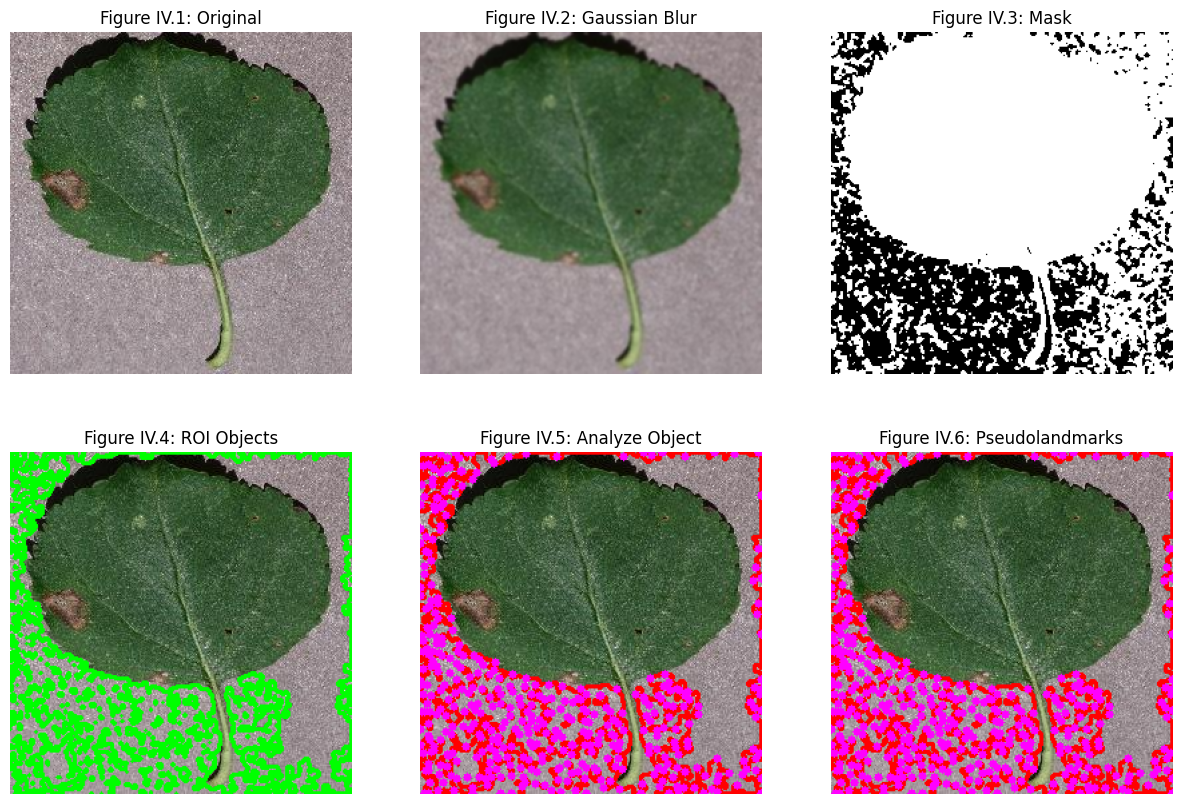

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "images/Apple/apple_black_rot/image (1).JPG"  
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Apply Gaussian blur
gaussian_blur = cv2.GaussianBlur(original_img, (5, 5), 0)

# Convert to grayscale and apply threshold to create a binary mask
gray_img = cv2.cvtColor(gaussian_blur, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours for ROI detection
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
roi_img = np.copy(original_img)
cv2.drawContours(roi_img, contours, -1, (0, 255, 0), 2)

# Analyze object: draw contours and lines to simulate pseudolandmarks
analyze_img = np.copy(original_img)
cv2.drawContours(analyze_img, contours, -1, (255, 0, 0), 2)

# Drawing pseudolandmarks (center points of contours)
for contour in contours:
    for i, point in enumerate(contour[::10]):  # Draw fewer points for simplicity
        center = tuple(point[0])
        cv2.circle(analyze_img, center, 3, (255, 0, 255), -1)

# Display images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(original_img)
axs[0, 0].set_title("Figure IV.1: Original")
axs[0, 0].axis('off')

# Gaussian Blur
axs[0, 1].imshow(gaussian_blur, cmap='gray')
axs[0, 1].set_title("Figure IV.2: Gaussian Blur")
axs[0, 1].axis('off')

# Mask
axs[0, 2].imshow(mask, cmap='gray')
axs[0, 2].set_title("Figure IV.3: Mask")
axs[0, 2].axis('off')

# ROI Detection
axs[1, 0].imshow(roi_img)
axs[1, 0].set_title("Figure IV.4: ROI Objects")
axs[1, 0].axis('off')

# Analyze Object (Contours and Pseudolandmarks)
axs[1, 1].imshow(analyze_img)
axs[1, 1].set_title("Figure IV.5: Analyze Object")
axs[1, 1].axis('off')

# Pseudolandmarks
axs[1, 2].imshow(analyze_img)
axs[1, 2].set_title("Figure IV.6: Pseudolandmarks")
axs[1, 2].axis('off')

plt.show()
